# Entropy

## Libraries

In [1]:
import seaborn as sns 
import numpy as np
import math
import matplotlib.pyplot as plt
import unicodedata
import random
from scipy.stats import uniform,rice
import seaborn as sns #librería útil para graficar mapas de calor.

##English Text

In [2]:
##ACCEDEMOS AL ARCHIVO DE TEXTO DESEADO:
nombreArchivo="EnglishReadFull.txt"

with open(nombreArchivo) as f:
    text = f.read()##LEEMOS EL ARCHIVO
    text = unicodedata.normalize("NFKD", text)
    a = np.array(list(text))#PASAMOS EL ARCHIVO A UN ARREGLO
    


##FUNCIONES

In [3]:
#FUNCION QUE CALCULA LA ENTROPIA DE LA LISTA DE TEXTO Y GRAFICA LA PROBABILIDAD A MARGINAL DE CADA ELEMENTO 
def EntropyText(Arreglo_Texto,PrintCaracters=False,ProbaMarginal=True,PrintEntropy=True):

  char, cnt = np.unique(Arreglo_Texto, return_counts=True) ## Obtenemos la Cantidad de letras y sus apariciones respectivas 
  
  p = cnt/np.sum(cnt) ## HALLAMOS LA PROBABILIDAD MARGINAL DE CADA ELEMENTO
  if(PrintCaracters):
   print('Caracteres:',char) ## IMPRIMIMOS LA LISTA CON LAS LETRAS
  if (ProbaMarginal):

   plt.stem(char,p, 'b') ## GRAFICAMOS CADA LETRA CON SU CORRESPONDIENTE PROBABILIDAD MARGINAL
   plt.ylabel('P(x_n)')
   plt.show()
  H = -np.sum(p * np.log2(p)) ## CALCULAMOS SU ENTROPIA UTILIZANDO B=2 ES DECIR BINARIO
  if(PrintEntropy):
   print("==========ENTROPIA=========")
   print("                           ")
   print('Entropy:{}'.format(H)) 

  return H,char,cnt

"""
Input
-----------------
Arreglo_Texto(List-Array): Lista o Arreglo que contiene todas las componentes del texto 
PrintCaracters(Boole): Variable booleana que determina si se desea imprimir los componentes reconocidos en el texto
ProbaMarginal(Boole): Variable booleana que determina si se desea obtener el grafico de la probabilidad marginal de cada elemento

Return
------------------

H=Entropia (float)
char= Caracter (list)
cnt= Contadores de cada Caracter (List)

"""

##FUNCION QUE ENTREGA EL MAPA DE CALOR DE LA MATRIZ DE PROBABILIDADES CONJUNTA:

def MapProbConditional(char):
  Lista_Posiciones_Aparicion=[]#Lista Para Guardar las apariciones de cada caracter de forma booleana analizando todo el texto
  ## 1 si aparece y 0 si no,analizando cada posicion del texto 
  i=0
  for Caracter_buscado in char:
    if i<len(char):
      Lista_Posiciones_Aparicion.append([int(Caracter_texto==Caracter_buscado) for Caracter_texto in text])
      i+=1
  MATRIZ_PROBABILIDADES_CONDICIONALES=[] 
  LISTA_PROBABILIDADES_CONDICIONALES=[]
  ##LAS VARIABLES A Y B DETERMINAN LOS CARACTERES QUE QUIERO ANALIZAR DE LA LISTA DE CARACTERES
  for A in range (0,len(Lista_Posiciones_Aparicion)):
   for B in range(0,len(Lista_Posiciones_Aparicion)):
        his,_,_=np.histogram2d(Lista_Posiciones_Aparicion[A],Lista_Posiciones_Aparicion[B],density=1)
        his=his/his.sum()
        k=his/his.sum(axis=0) # PROBABILIDAD CONDICIONAL
        if A==B:
          LISTA_PROBABILIDADES_CONDICIONALES.append(k[len(k)-1][len(k[0])-1]) 
        else:
          LISTA_PROBABILIDADES_CONDICIONALES.append(k[len(k)-1][0])
   MATRIZ_PROBABILIDADES_CONDICIONALES.append(LISTA_PROBABILIDADES_CONDICIONALES.copy())
   LISTA_PROBABILIDADES_CONDICIONALES.clear()

   ##GENERAMOS EL MAPA DE CALOR:
  plt.figure(figsize=(14,14))
  sns.heatmap(MATRIZ_PROBABILIDADES_CONDICIONALES,xticklabels=char,yticklabels=char,annot=True,linewidths=0.5) 
  plt.tight_layout()
  plt.show()
   
"""
input
-----------------
char(list): Lista de los caracteres del texto

Return
------------------
Null
"""


'\ninput\n-----------------\nchar(list): Lista de los caracteres del texto\n\nReturn\n------------------\nNull\n'

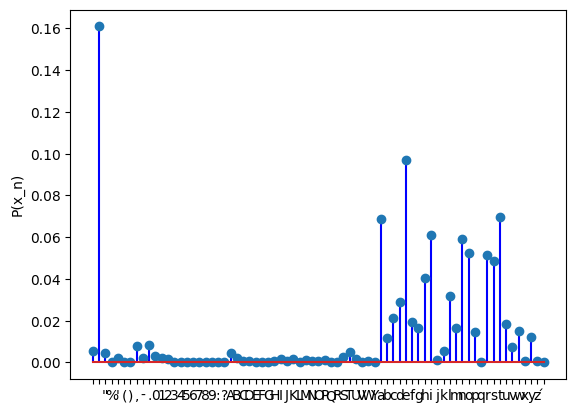

==========ENTROPIA=========
                           
Entropy:4.486943348940323


In [4]:
##CALCULAMOS LA PROBABILIDAD MARGINAL DE CADA ELEMENTO DEL TEXTO Y ENTROPIA DEL TEXTO:
Entropia,char,cnt=EntropyText(a)

##Recibimos los datos para el calculo de la probabilidad conjunta

/tmp/ipykernel_295/1485724555.py:55: RuntimeWarning: invalid value encountered in divide
  k=his/his.sum(axis=0) # PROBABILIDAD CONDICIONAL


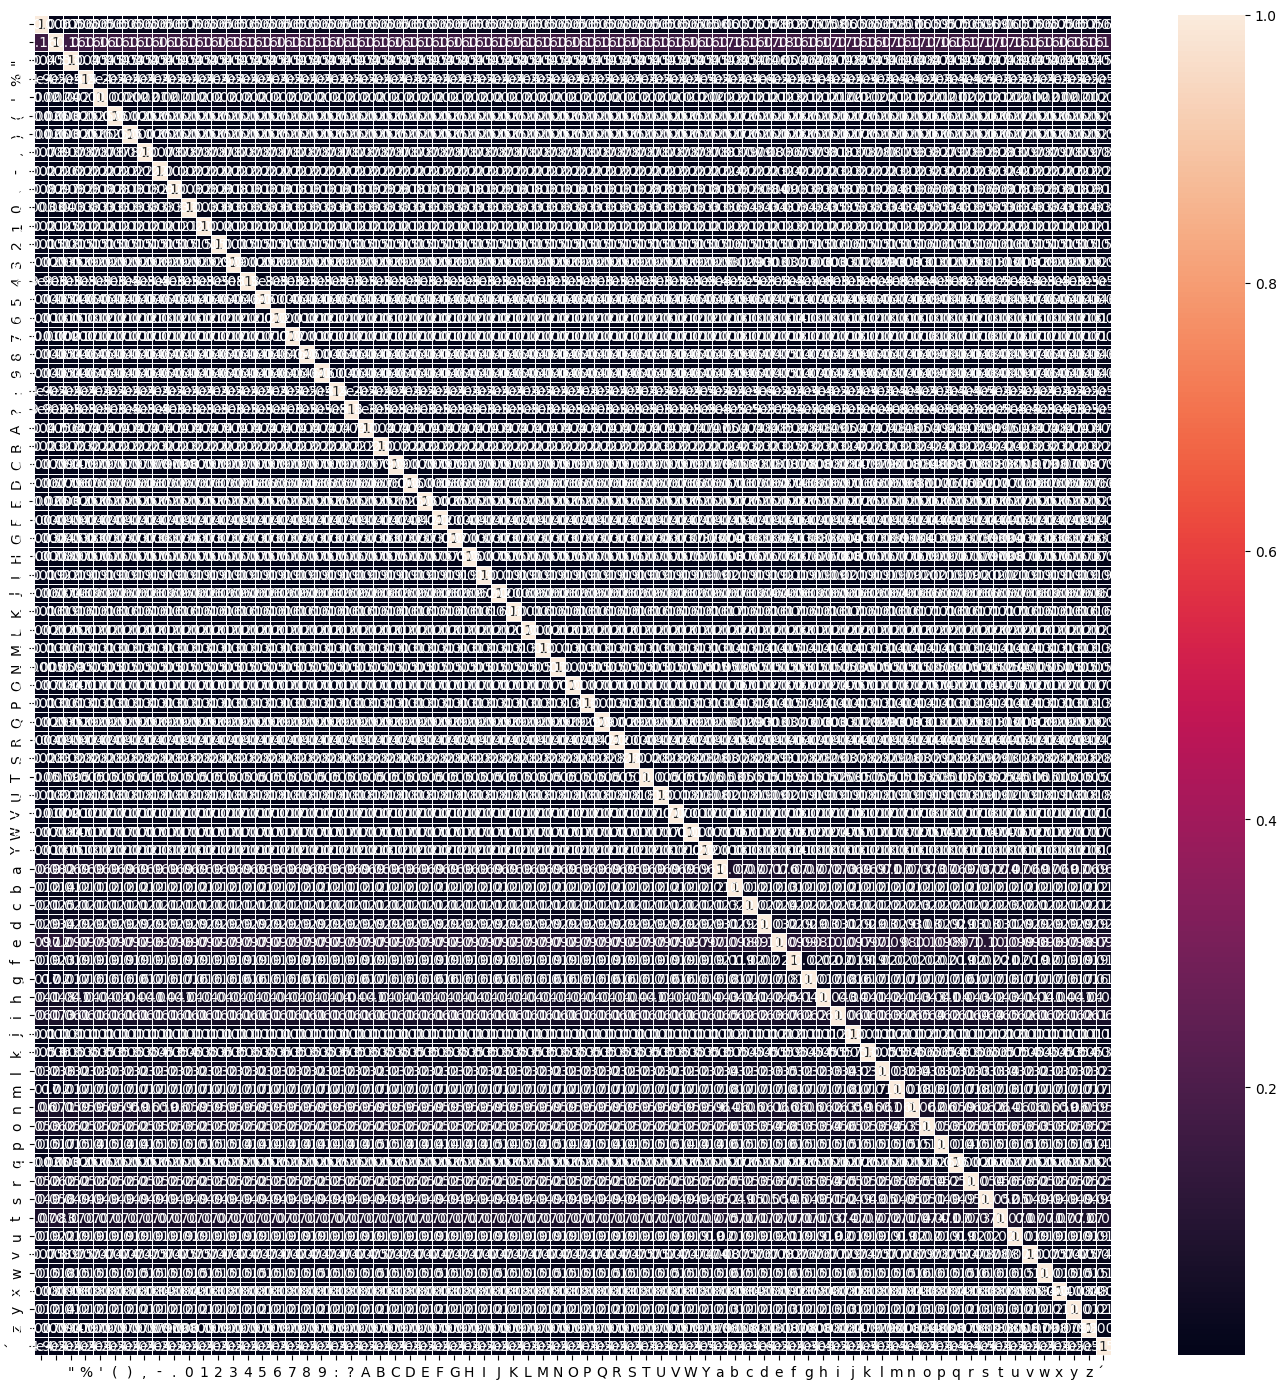

In [5]:
MapProbConditional(char) ##MAPA DE CALOR DE PROBABILIDADES CONDICIONALES

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fd3ad2a8-bbba-49db-af61-dafb5455f90f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>